Hospital Admission Trends and Bed Occupancy Analysis with Forecast (MAJOR PROJECT)

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn in c:\users\diksha tiwari\anaconda\lib\site-packages (0.13.2)



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read dataset
patients = pd.read_csv("patients_final.csv")
appointments = pd.read_csv("appointments_final.csv")
print("Patients Shape:", patients.shape)
print("Appointments Shape:", appointments.shape)

Patients Shape: (1000, 8)
Appointments Shape: (200, 10)


In [4]:
patients.head()

,patient_id,age,arrival_date,departure_date,service,gender,department,bed_availability
0,PAT-09484753,24,2025-03-16,2025-03-22,surgery,Male,Neurology,Available
1,PAT-f0644084,6,2025-12-13,2025-12-14,surgery,Male,Orthopedics,Occupied
2,PAT-ac6162e4,24,2025-06-29,2025-07-05,general_medicine,Male,Cardiology,Available
3,PAT-3dda2bb5,32,2025-10-12,2025-10-23,emergency,Male,Pediatrics,Available
4,PAT-08591375,25,2025-02-18,2025-02-25,ICU,Male,Cardiology,Available


In [5]:
appointments.head()

,appointment_id,patient_id,appointment_date,reason_for_visit,status,gender,department,age,bed_availability,discharge_date
0,A001,P034,2023-08-09,Therapy,Scheduled,Male,Cardiology,63,Available,2024-01-03
1,A002,P032,2023-06-09,Therapy,No-show,Male,Cardiology,17,Occupied,2024-01-15
2,A003,P048,2023-06-28,Consultation,Cancelled,Female,General Medicine,73,Occupied,2024-01-22
3,A004,P025,2023-09-01,Consultation,Cancelled,Male,Cardiology,33,Available,2024-01-09
4,A005,P040,2023-07-06,Emergency,No-show,Female,General Medicine,84,Available,2024-01-09


In [6]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   patient_id        1000 non-null   object
 1   age               1000 non-null   int64 
 2   arrival_date      1000 non-null   object
 3   departure_date    1000 non-null   object
 4   service           1000 non-null   object
 5   gender            1000 non-null   object
 6   department        1000 non-null   object
 7   bed_availability  1000 non-null   object
dtypes: int64(1), object(7)
memory usage: 62.6+ KB


In [7]:
appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   appointment_id    200 non-null    object
 1   patient_id        200 non-null    object
 2   appointment_date  200 non-null    object
 3   reason_for_visit  200 non-null    object
 4   status            200 non-null    object
 5   gender            200 non-null    object
 6   department        200 non-null    object
 7   age               200 non-null    int64 
 8   bed_availability  200 non-null    object
 9   discharge_date    200 non-null    object
dtypes: int64(1), object(9)
memory usage: 15.8+ KB


In [8]:
#Filling missing values
patients["gender"] = patients["gender"].fillna("Unknown")
patients["bed_availability"] = patients["bed_availability"].fillna(0)

appointments["status"] = appointments["status"].fillna("Pending")
appointments["age"] = appointments["age"].fillna(appointments["age"].median())

In [9]:
#to remove duplicates
patients = patients.drop_duplicates()
appointments = appointments.drop_duplicates()

In [10]:
#to covert datatype from object to date
appointments["appointment_date"] = pd.to_datetime(appointments["appointment_date"], errors="coerce")

appointments["discharge_date"] = pd.to_datetime(appointments["discharge_date"], errors="coerce")

In [11]:
appointments.dtypes

appointment_id              object
patient_id                  object
appointment_date    datetime64[ns]
reason_for_visit            object
status                      object
gender                      object
department                  object
age                          int64
bed_availability            object
discharge_date      datetime64[ns]
dtype: object

In [12]:
patients["arrival_date"] = pd.to_datetime(patients["arrival_date"], errors="coerce")

patients["departure_date"] = pd.to_datetime(patients["departure_date"], errors="coerce")

In [13]:
patients.dtypes

patient_id                  object
age                          int64
arrival_date        datetime64[ns]
departure_date      datetime64[ns]
service                     object
gender                      object
department                  object
bed_availability            object
dtype: object

In [14]:
appointments["length_of_stay"] = (
  appointments["discharge_date"] - appointments["appointment_date"]
).dt.days

In [15]:
patients["length_of_stay"] = (
    patients["departure_date"] - patients["arrival_date"]
).dt.days

#### patients eda

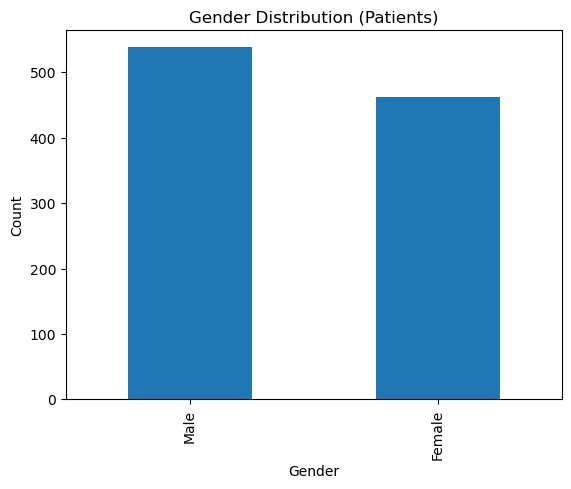

In [16]:
patients["gender"].value_counts().plot(
    kind="bar", title="Gender Distribution (Patients)"
)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

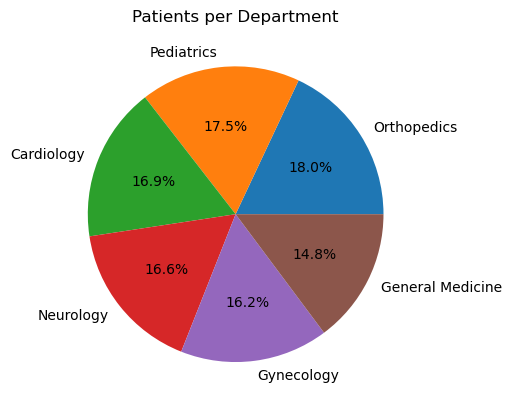

In [17]:
patients["department"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", title="Patients per Department"
)
plt.ylabel("")
plt.show()

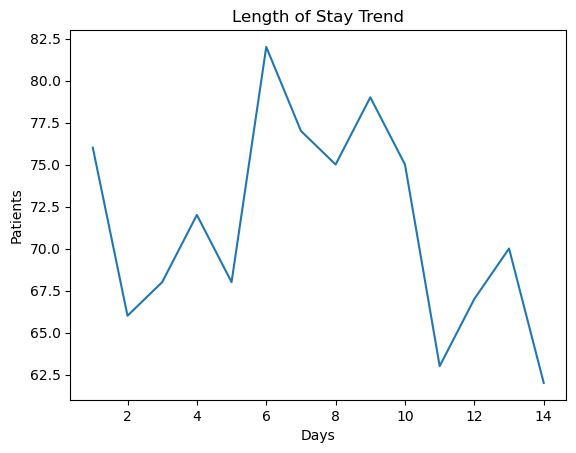

In [18]:
patients["length_of_stay"] = (
    patients["departure_date"] - patients["arrival_date"]).dt.days

patients["length_of_stay"].value_counts().sort_index().plot(
    kind="line", title="Length of Stay Trend")
plt.xlabel("Days")
plt.ylabel("Patients")
plt.show()

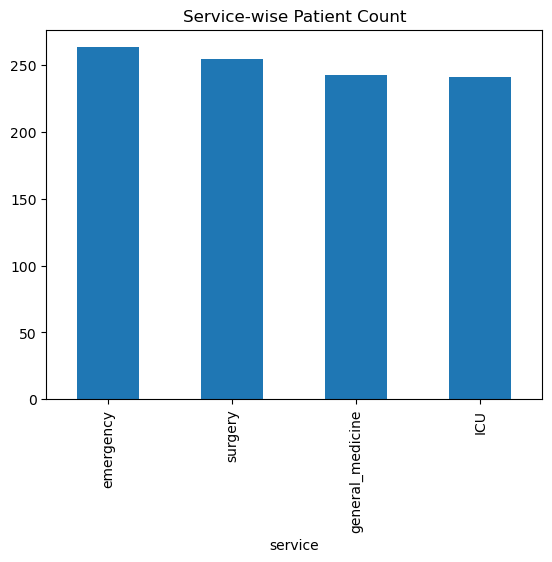

In [19]:
patients["service"].value_counts().plot(
    kind="bar", title="Service-wise Patient Count")
plt.show()

In [20]:
patients_corr = patients[
    ["age", "length_of_stay"]].corr()
patients_corr

,age,length_of_stay
age,1.000000,-0.050149
length_of_stay,-0.050149,1.000000


In [21]:
import seaborn
print(seaborn)
print(seaborn.__file__)


<module 'seaborn' from 'C:\\Users\\diksha tiwari\\anaconda\\Lib\\site-packages\\seaborn\\__init__.py'>
C:\Users\diksha tiwari\anaconda\Lib\site-packages\seaborn\__init__.py


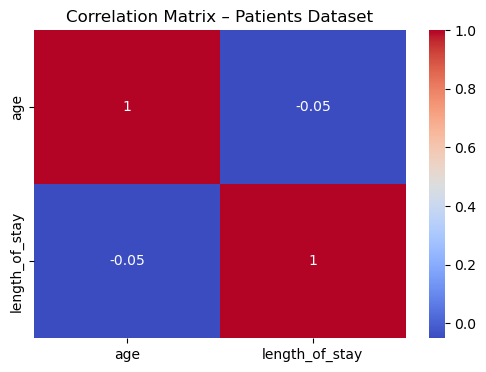

In [22]:
#heatmap
plt.figure(figsize=(6,4))
sns.heatmap(patients_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix – Patients Dataset")
plt.show()

#### appointments eda

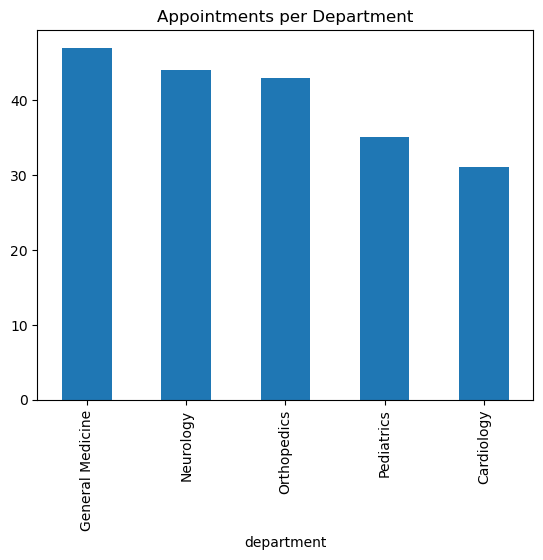

In [23]:
appointments["department"].value_counts().plot(
    kind="bar", title="Appointments per Department")
plt.show()

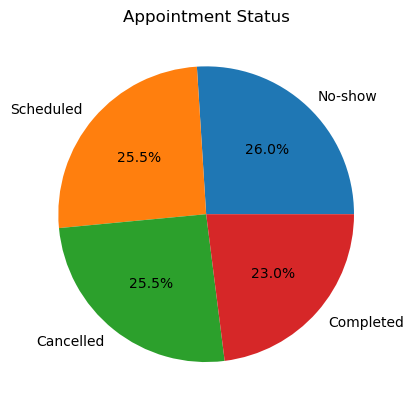

In [24]:
appointments["status"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", title="Appointment Status")
plt.ylabel("")
plt.show()

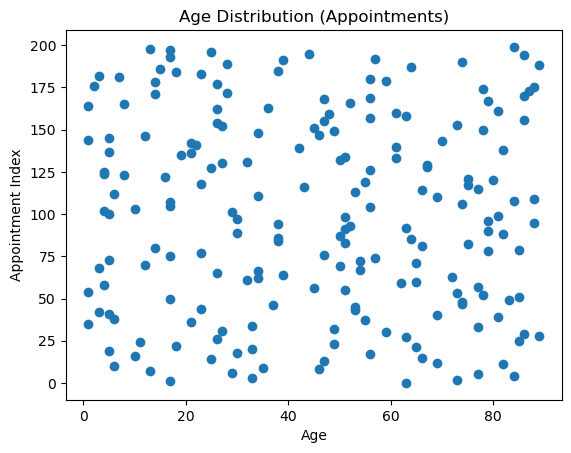

In [25]:
plt.scatter(appointments["age"], range(len(appointments)))
plt.xlabel("Age")
plt.ylabel("Appointment Index")
plt.title("Age Distribution (Appointments)")
plt.show()

C:\Users\diksha tiwari\AppData\Local\Temp\ipykernel_7332\934470849.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  appointments.set_index("appointment_date").resample("M").size().plot(


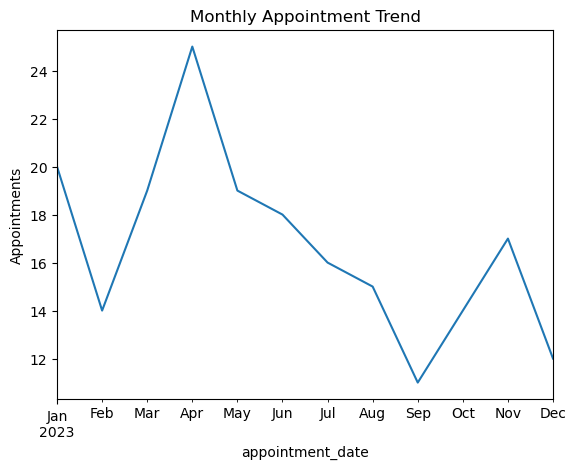

In [26]:
appointments.set_index("appointment_date").resample("M").size().plot(
    kind="line", title="Monthly Appointment Trend")
plt.ylabel("Appointments")
plt.show()

In [27]:
appointments["appointment_count"] = (
    appointments.groupby("department")["department"].transform("count"))

In [28]:
appointments_corr = appointments[
    ["age", "appointment_count"]].corr()
appointments_corr

,age,appointment_count
age,1.000000,0.046214
appointment_count,0.046214,1.000000


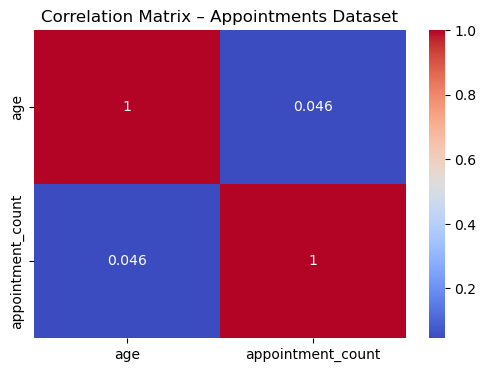

In [29]:
plt.figure(figsize=(6,4))
sns.heatmap(appointments_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix – Appointments Dataset")
plt.show()

Feature Engineering

In [30]:
appointments['appointment_date'] = pd.to_datetime(appointments['appointment_date'])


In [31]:
appointments['year'] = appointments['appointment_date'].dt.year
appointments['month'] = appointments['appointment_date'].dt.month
appointments['day'] = appointments['appointment_date'].dt.day
appointments['weekday'] = appointments['appointment_date'].dt.day_name()
appointments['week'] = appointments['appointment_date'].dt.isocalendar().week


In [32]:
daily_appointments = appointments.groupby('appointment_date').size().reset_index(name='appointments_per_day')


In [33]:
patient_visit_freq = appointments.groupby('patient_id').size().reset_index(name='visit_count')


In [34]:
patients['age_group'] = pd.cut(
    patients['age'],
    bins=[0, 18, 35, 60, 100],
    labels=['Child', 'Young Adult', 'Adult', 'Senior']
)


In [35]:
patients['gender'] = patients['gender'].str.capitalize()


In [36]:
patients['high_risk_patient'] = patients['age'] >= 60


In [37]:
Hospital1_df=appointments
Hospital2_df=patients

In [38]:
Hospital1_df


,appointment_id,patient_id,appointment_date,reason_for_visit,status,gender,department,age,bed_availability,discharge_date,length_of_stay,appointment_count,year,month,day,weekday,week
0,A001,P034,2023-08-09,Therapy,Scheduled,Male,Cardiology,63,Available,2024-01-03,147,31,2023,8,9,Wednesday,32
1,A002,P032,2023-06-09,Therapy,No-show,Male,Cardiology,17,Occupied,2024-01-15,220,31,2023,6,9,Friday,23
2,A003,P048,2023-06-28,Consultation,Cancelled,Female,General Medicine,73,Occupied,2024-01-22,208,47,2023,6,28,Wednesday,26
3,A004,P025,2023-09-01,Consultation,Cancelled,Male,Cardiology,33,Available,2024-01-09,130,31,2023,9,1,Friday,35
4,A005,P040,2023-07-06,Emergency,No-show,Female,General Medicine,84,Available,2024-01-09,187,47,2023,7,6,Thursday,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,A196,P045,2023-10-26,Checkup,Cancelled,Male,Orthopedics,44,Available,2024-01-28,94,43,2023,10,26,Thursday,43
196,A197,P001,2023-04-01,Emergency,No-show,Female,General Medicine,25,Available,2024-01-25,299,47,2023,4,1,Saturday,13
197,A198,P022,2023-05-15,Therapy,No-show,Female,Orthopedics,17,Available,2024-01-20,250,43,2023,5,15,Monday,20
198,A199,P017,2023-05-01,Follow-up,Completed,Female,General Medicine,13,Available,2024-01-30,274,47,2023,5,1,Monday,18


In [39]:
Hospital2_df

,patient_id,age,arrival_date,departure_date,service,gender,department,bed_availability,length_of_stay,age_group,high_risk_patient
0,PAT-09484753,24,2025-03-16,2025-03-22,surgery,Male,Neurology,Available,6,Young Adult,False
1,PAT-f0644084,6,2025-12-13,2025-12-14,surgery,Male,Orthopedics,Occupied,1,Child,False
2,PAT-ac6162e4,24,2025-06-29,2025-07-05,general_medicine,Male,Cardiology,Available,6,Young Adult,False
3,PAT-3dda2bb5,32,2025-10-12,2025-10-23,emergency,Male,Pediatrics,Available,11,Young Adult,False
4,PAT-08591375,25,2025-02-18,2025-02-25,ICU,Male,Cardiology,Available,7,Young Adult,False
...,...,...,...,...,...,...,...,...,...,...,...
995,PAT-a01bf534,26,2025-12-02,2025-12-04,emergency,Male,Orthopedics,Available,2,Young Adult,False
996,PAT-87fa07bd,89,2025-11-18,2025-11-30,emergency,Male,Neurology,Available,12,Senior,True
997,PAT-8f07e894,72,2025-12-12,2025-12-21,ICU,Male,Cardiology,Occupied,9,Senior,True
998,PAT-4ae301e1,47,2025-02-08,2025-02-20,ICU,Male,Orthopedics,Occupied,12,Adult,False


#### SQLite Integration

In [41]:
import sqlite3

conn = sqlite3.connect('hospital_major_project.db')


In [42]:
Hospital1_df.to_sql('Hospital1_df', conn, if_exists='replace', index=False)
Hospital2_df.to_sql('Hospital2_df', conn, if_exists='replace', index=False)


1000

In [43]:
pd.read_sql("""
SELECT age_group, COUNT(*) as total_appointments
FROM Hospital2_df
GROUP BY age_group
""", conn)


,age_group,total_appointments
0,None,12
1,Adult,268
2,Child,182
3,Senior,338
4,Young Adult,200


In [44]:
#Time series
Hospital1_df['appointment_date'] = pd.to_datetime(
   Hospital1_df['appointment_date']
)


In [45]:
daily_admissions = (
    Hospital1_df
    .groupby(Hospital1_df['appointment_date'].dt.date)
    .size()
    .reset_index(name='daily_admissions')
)

daily_admissions.rename(
    columns={'appointment_date': 'date'}, inplace=True
)

daily_admissions['date'] = pd.to_datetime(daily_admissions['date'])


In [46]:
#time based feaatures
daily_admissions['day'] = daily_admissions['date'].dt.day
daily_admissions['month'] = daily_admissions['date'].dt.month
daily_admissions['year'] = daily_admissions['date'].dt.year
daily_admissions['day_of_week'] = daily_admissions['date'].dt.dayofweek
daily_admissions['is_weekend'] = daily_admissions['day_of_week'].isin([5,6]).astype(int)


In [47]:
#rolling avg
daily_admissions['rolling_7d'] = daily_admissions['daily_admissions'].rolling(7).mean()
daily_admissions['rolling_14d'] = daily_admissions['daily_admissions'].rolling(14).mean()


In [48]:
daily_admissions.head()
daily_admissions.tail()


,date,daily_admissions,day,month,year,day_of_week,is_weekend,rolling_7d,rolling_14d
153,2023-12-18,1,18,12,2023,0,0,1.000000,1.285714
154,2023-12-20,1,20,12,2023,2,0,1.000000,1.214286
155,2023-12-24,1,24,12,2023,6,1,1.000000,1.071429
156,2023-12-26,2,26,12,2023,1,0,1.142857,1.142857
157,2023-12-30,1,30,12,2023,5,1,1.142857,1.142857


Forecasting

In [49]:
prophet_df = daily_admissions[['date', 'daily_admissions']].rename(
    columns={'date':'ds', 'daily_admissions':'y'}
)


In [50]:
from prophet import Prophet

model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

model.fit(prophet_df)


22:04:49 - cmdstanpy - INFO - Chain [1] start processing
22:04:54 - cmdstanpy - INFO - Chain [1] done processing


In [51]:
#forecast future admissions
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)


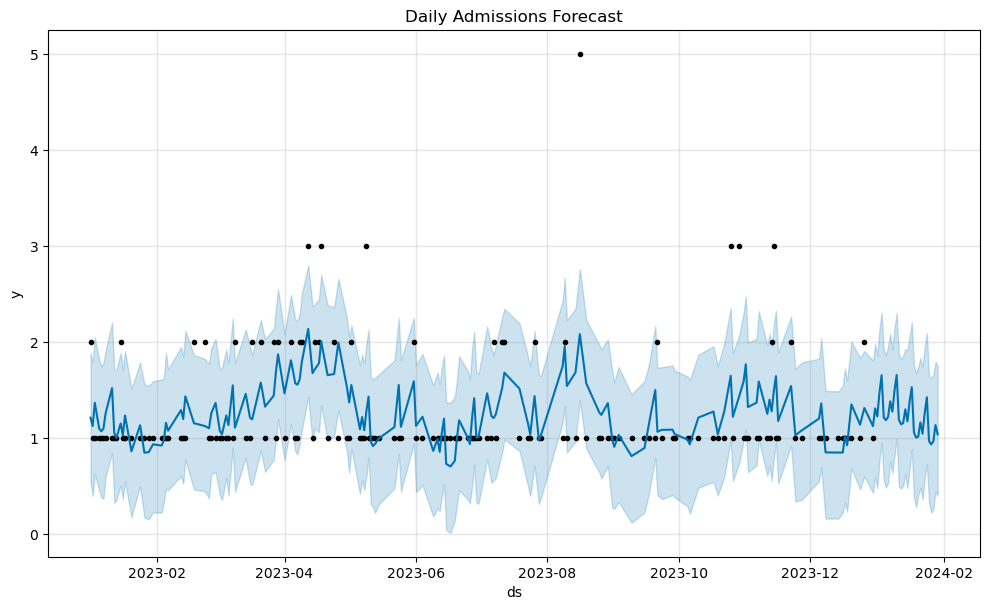

In [52]:
model.plot(forecast)
plt.title("Daily Admissions Forecast")
plt.show()


OCCUPANCY LOGIC MAPPING

In [53]:
Hospital2_df['admission_date'] = pd.to_datetime(Hospital2_df['arrival_date'])
Hospital2_df['discharge_date'] = pd.to_datetime(Hospital2_df['departure_date'])


In [54]:
Hospital2_df['stay_duration'] = (
    Hospital2_df['discharge_date'] - Hospital2_df['admission_date']
).dt.days


In [55]:
avg_stay = Hospital2_df['stay_duration'].mean()

In [56]:
print("Hospital 1 columns:", Hospital1_df.columns)
print("Hospital 2 columns:",Hospital2_df.columns)

Hospital 1 columns: Index(['appointment_id', 'patient_id', 'appointment_date', 'reason_for_visit',
       'status', 'gender', 'department', 'age', 'bed_availability',
       'discharge_date', 'length_of_stay', 'appointment_count', 'year',
       'month', 'day', 'weekday', 'week'],
      dtype='object')
Hospital 2 columns: Index(['patient_id', 'age', 'arrival_date', 'departure_date', 'service',
       'gender', 'department', 'bed_availability', 'length_of_stay',
       'age_group', 'high_risk_patient', 'admission_date', 'discharge_date',
       'stay_duration'],
      dtype='object')


In [57]:
Hospital1_df['appointment_date'] = pd.to_datetime(
    Hospital1_df['appointment_date'], errors='coerce'
)


In [58]:
Hospital1_df['appointment_date'].isna().sum()


0

In [59]:
daily_admissions.to_sql("daily_admissions_ts", conn, if_exists="replace", index=False)


158

In [60]:
prophet_df.to_sql(
    name="admissions_forecast",
    con=conn,
    if_exists="replace",
    index=False
)


158

In [61]:
occupancy_df = Hospital2_df.groupby('admission_date').agg({
    'stay_duration': 'mean',
    'patient_id': 'count'
}).reset_index()

occupancy_df.columns = ['date', 'avg_stay_duration', 'daily_patients']


In [62]:
occupancy_df.to_sql(
    name="bed_occupancy_metrics",
    con=conn,
    if_exists="replace",
    index=False
)


344

In [63]:
#To verify tables
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
cursor.fetchall()


[('Hospital1_df',),
 ('Hospital2_df',),
 ('daily_admissions_ts',),
 ('admissions_forecast',),
 ('bed_occupancy_metrics',)]

In [64]:
cursor.execute("DROP TABLE IF EXISTS appointments;")
cursor.execute("DROP TABLE IF EXISTS patients;")


In [65]:
conn.commit()


In [66]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
cursor.fetchall()


[('Hospital1_df',),
 ('Hospital2_df',),
 ('daily_admissions_ts',),
 ('admissions_forecast',),
 ('bed_occupancy_metrics',)]

In [67]:
conn.close()
